# Cleaning the school budget data

In this notebook, we clean the school budget data (specifically addressing NaN value).

In [1]:
import pandas as pd

data_2006 = pd.read_csv('raw_school_expenditures_by_year/year_2006.csv', index_col=0)
data_2007 = pd.read_csv('raw_school_expenditures_by_year/year_2007.csv', index_col=0)
data_2008 = pd.read_csv('raw_school_expenditures_by_year/year_2008.csv', index_col=0)
data_2009 = pd.read_csv('raw_school_expenditures_by_year/year_2009.csv', index_col=0)
data_2010 = pd.read_csv('raw_school_expenditures_by_year/year_2010.csv', index_col=0)
data_2011 = pd.read_csv('raw_school_expenditures_by_year/year_2011.csv', index_col=0)
data_2012 = pd.read_csv('raw_school_expenditures_by_year/year_2012.csv', index_col=0)

In [2]:
data_2008.head(6)

,Additions_to_Regular_Salary,Additions_to_Salary__Projected_Expenses,After_School_and_Student_Activities,Ancillary_Support_Services_All_Funds,Assistant_Principals,Attendance__Outreach_Services,Building_Maintenance,Building_Services_All_Funds,Central_Administration_All_Funds,Central_Instructional_Support_All_Funds,...,Supervisors,Supplies_Materials_Equipment_Telephones,SystemWide_Costs,SystemWide_Obligations,Teachers,Text_Books,Title_1,Total,Transportation,_No_type_required
M015,3,97,170,1936,1,286,267,1393,331,63,...,9,126,394,1572,7684,101,Yes,22026,511,283
M019,4,69,195,1876,465,147,169,1270,329,59,...,10,153,388,1572,7942,215,Yes,19724,931,292
M020,3,75,211,1607,233,326,149,1204,330,63,...,51,128,393,1572,7850,156,Yes,19247,295,283
M034,3,83,303,1292,350,286,316,1486,330,57,...,8,231,388,1572,7439,94,Yes,18967,337,282
M063,3,91,203,2586,1,31,141,1644,330,61,...,8,112,391,1572,10331,125,Yes,27275,1120,282
M064,4,99,191,1850,544,163,206,946,330,62,...,9,147,393,1572,8694,273,Yes,22200,798,292


The first thing we need to do is drop _No_type_required, which is a duplicated feature in the 2006-2008 datasets.

In [14]:
all_years_data = {2006: data_2006, 2007: data_2007, 2008: data_2008, 2009: data_2009, 2010: data_2010, 2011: data_2011, 2012: data_2012}
for year in all_years_data:
    print all_years_data[year].School.value_counts()[all_years_data[year].School.value_counts()>1]

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
K751    2
dtype: int64
K751    2
dtype: int64


In [4]:
for year in [2006, 2007, 2008]:
    all_years_data[year] = all_years_data[year].drop('_No_type_required', axis=1)

In [5]:
for year in all_years_data:
    print all_years_data[year].shape

(1347, 58)
(1366, 58)
(1394, 58)
(1437, 58)
(1472, 58)
(1497, 58)
(1508, 58)


Next we will fill in missing values with 0. This is justified under the assumption that if a row is missing from the expenditure report, it is because the school did not have any expenditures under that category.

In [6]:
for year in all_years_data:
    all_years_data[year].fillna(0.0,inplace=True)
    print '\nYear = ', str(year)
    print 'Number observations', len(all_years_data[year])
    print 'Number missing', all_years_data[year].isnull().sum().sum()


Year =  2006
Number observations 1347
Number missing 0

Year =  2007
Number observations 1366
Number missing 0

Year =  2008
Number observations 1394
Number missing 0

Year =  2009
Number observations 1437
Number missing 0

Year =  2010
Number observations 1472
Number missing 0

Year =  2011
Number observations 1497
Number missing 0

Year =  2012
Number observations 1508
Number missing 0


Great! Now let's check that all values are greater than 0:

In [7]:
for year in all_years_data:
    print 'Number of non-zero minimum features in year {} = {}'.format(year, (all_years_data[year].min()<0).sum())

Number of non-zero minimum features in year 2006 = 0
Number of non-zero minimum features in year 2007 = 0
Number of non-zero minimum features in year 2008 = 0
Number of non-zero minimum features in year 2009 = 0
Number of non-zero minimum features in year 2010 = 0
Number of non-zero minimum features in year 2011 = 0
Number of non-zero minimum features in year 2012 = 0


Thus no features have negative values. Next, we drop features with 0 variance:

In [8]:
for year in all_years_data:
    print 'Year {}: Number of 0 variance features originally = {}'.format(year, (all_years_data[year].std() == 0.0).sum())
    mask = list((all_years_data[year].std() == 0.0).loc[(all_years_data[year].std() == 0.0)==True].index)
    all_years_data[year].drop(mask, axis=1, inplace=True)
    print 'Year {}: Number of 0 variance features after cleaning = {}'.format(year, (all_years_data[year].std() == 0.0).sum())

Year 2006: Number of 0 variance features originally = 6
Year 2006: Number of 0 variance features after cleaning = 0
Year 2007: Number of 0 variance features originally = 6
Year 2007: Number of 0 variance features after cleaning = 0
Year 2008: Number of 0 variance features originally = 5
Year 2008: Number of 0 variance features after cleaning = 0
Year 2009: Number of 0 variance features originally = 6
Year 2009: Number of 0 variance features after cleaning = 0
Year 2010: Number of 0 variance features originally = 5
Year 2010: Number of 0 variance features after cleaning = 0
Year 2011: Number of 0 variance features originally = 5
Year 2011: Number of 0 variance features after cleaning = 0
Year 2012: Number of 0 variance features originally = 7
Year 2012: Number of 0 variance features after cleaning = 0


Next, we convert Title_1 from a text feature to a dummie variable, with 'Yes' = 1 and 'No' = 0.

In [9]:
for year in all_years_data:
    all_years_data[year]['Title_1'] = all_years_data[year]['Title_1'].map({'Yes':1.0, 'No':0.0})
    print all_years_data[year]['Title_1'].value_counts()

1    1069
0     278
dtype: int64
1    1093
0     273
dtype: int64
1    1119
0     275
dtype: int64
1    1153
0     284
dtype: int64
1    1362
0     110
dtype: int64
1    1402
0      95
dtype: int64
1    1210
0     298
dtype: int64


Finally, let's explore the standard deviation of features in the dataset:

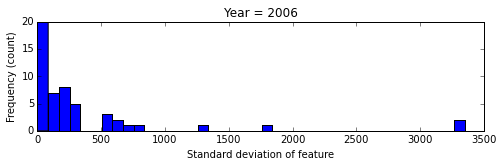

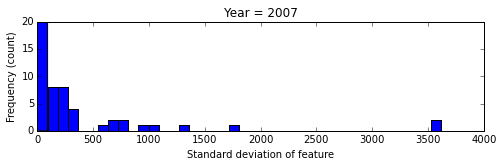

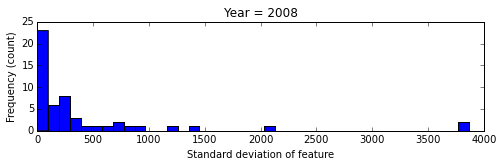

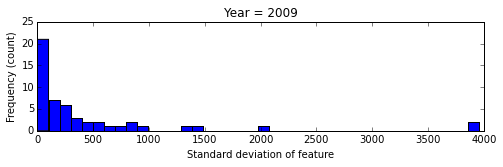

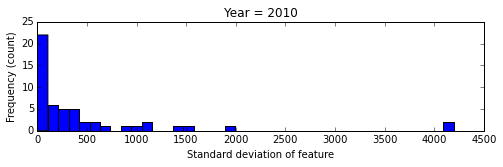

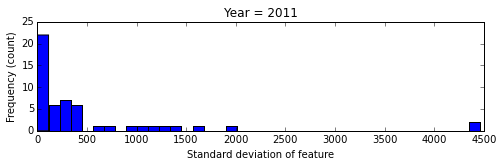

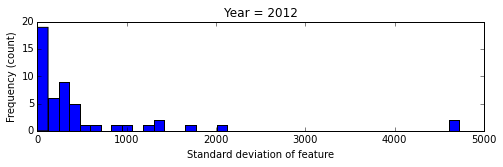

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

i=1
for year in all_years_data:
    plt.figure(figsize=(8, 16))
    ax = plt.subplot(7,1,i)
    ax.hist(all_years_data[year].std(), bins=40)
    ax.set_xlabel('Standard deviation of feature')
    ax.set_ylabel('Frequency (count)')
    ax.set_title('Year = {}'.format(year))
    i+=1

Now we save the cleaned data in a new csv file.

In [11]:
for year in all_years_data:
    path = '../../data/clean_expenditure_data_by_year/clean_year_' + str(year) + '.csv'
    all_years_data[year].to_csv(path)